In the taken dstaset of the Global finance company, we are tasked with developing an automated system to categorize individuals based on their creditworthiness. Over the years, the company has collected a wealth of credit-related information, and now the management wants to build an intelligent system to segregate people into credit score brackets, reducing manual efforts.

Our task involves leveraging the available credit-related data to train a predictive model that can effectively categorize individuals based on their credit scores. This model will play a crucial role in automating the assessment of creditworthiness, enabling us to make informed decisions efficiently.

To accomplish this, we'll need to preprocess the data, engineer relevant features, and select appropriate algorithms for training the model. Once trained, our model will be capable of classifying new individuals into predefined credit score categories, contributing to our company's goal of enhancing efficiency and accuracy in credit assessment processes.

In [91]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import zscore

In [92]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv",low_memory=False)
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data Analysis and Data Preprocessing

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [94]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [95]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [96]:
df.shape

(100000, 28)

In [97]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [98]:
print(df.nunique())
print(df.head())

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64
       

In [99]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [100]:
# The columns ID,  SSN, and Name are not useful for modeling and can be dropped.

df.drop(["ID","Name","SSN"],axis=1, inplace=True)

In [101]:
# # Handling Numerical variables

# Convert Categorical to Numeric
# Several columns are numeric but appear as categorical. 
# We will convert these columns to numeric, handling any non-numeric values by replacing or imputing them.
 

num_columns_to_fix   = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
            'Changed_Credit_Limit','Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

for i in num_columns_to_fix:
    df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(float)

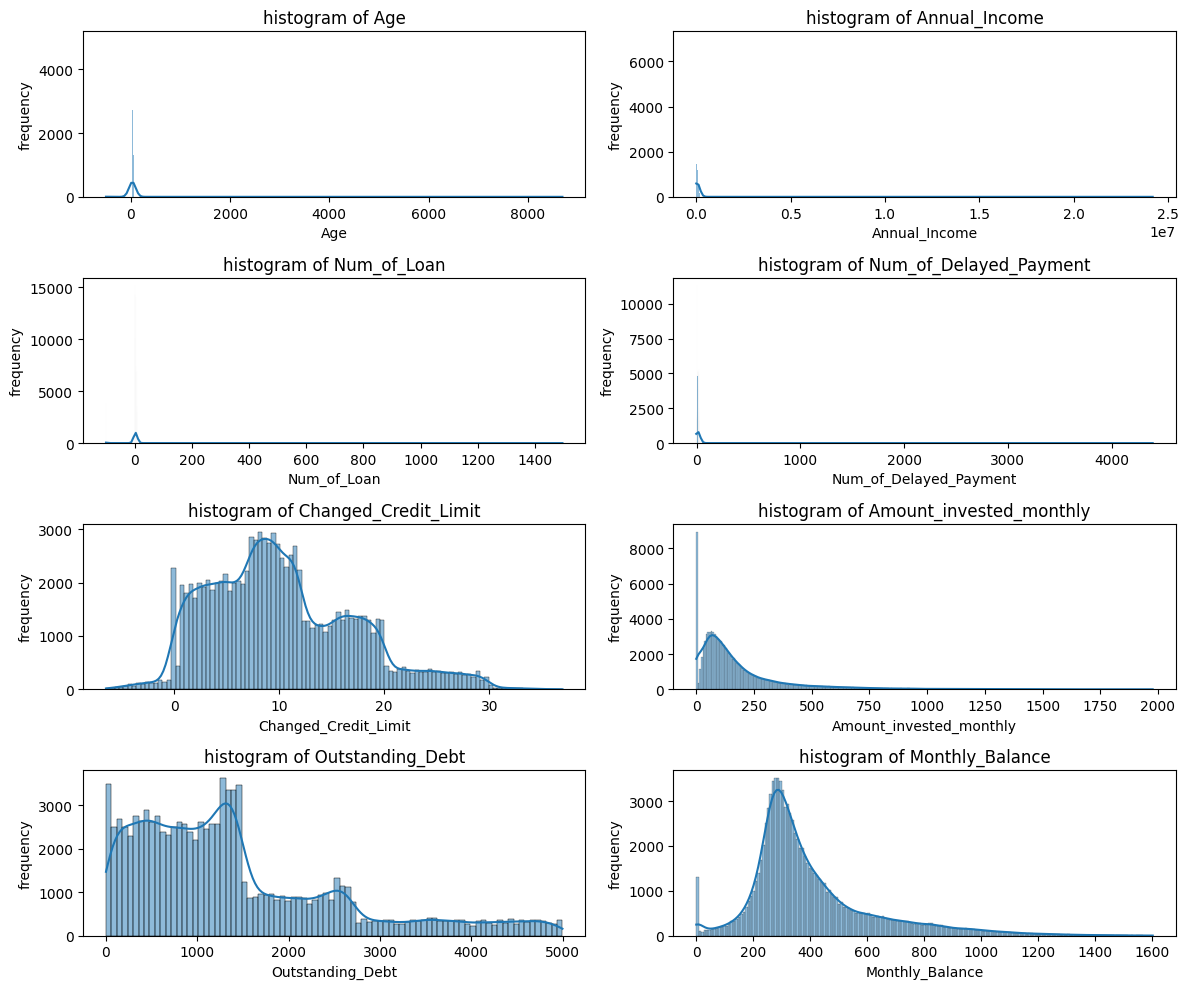

In [102]:
fig,axis=plt.subplots(nrows=4,ncols=2,figsize=(12,10))
k=axis.flatten()
for i,p in zip(num_columns_to_fix,k):
    sns.histplot(x=df[i],ax=p,kde=True)
    p.set_title(f"histogram of {i}")
    p.set_xlabel(i)
    p.set_ylabel("frequency")
plt.tight_layout()
plt.show()

In [103]:
# Type_of_loan
# It has multiple types of loans and not all are important so create dummy column for 9 most frequent types of loan

for i in df["Type_of_Loan"].value_counts().head(9).index[1:]:
    df[i] = df["Type_of_Loan"].fillna('').str.contains(i).astype(int)
del df["Type_of_Loan"]

In [104]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1,1,0,0,0,0,1,1
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1,1,0,0,0,0,1,1
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1,1,0,0,0,0,1,1
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1,1,0,0,0,0,1,1
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1,1,0,0,0,0,1,1


In [105]:
df['Num_Bank_Accounts']= df['Num_Bank_Accounts'].abs()
df["Num_Credit_Card"].replace(0,1,inplace=True)
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}
df['Credit_Mix'] = df['Credit_Mix'].map(m)

C:\Users\PC\AppData\Local\Temp\ipykernel_16248\3035083946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Num_Credit_Card"].replace(0,1,inplace=True)


In [106]:
def parse_years_and_months(arg):
    if isinstance(arg,str):
        age_parts=arg.split("Years and")
        years=int(age_parts[0]) if "Years" in arg else 0
        months_parts=age_parts[1].split("Months")[0] if "Months" in arg else 0
        months=int(months_parts)
        age=years*12 + months
        return age
    else:
        return 0

In [107]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_years_and_months)

In [108]:
# Convert the Customer_ID column into a sequential numerical

df["Customer_ID"] = pd.factorize(df["Customer_ID"])[0] + 1

In [109]:
df["Customer_ID"].value_counts()

Customer_ID
1        8
8351     8
8329     8
8330     8
8331     8
        ..
4169     8
4170     8
4171     8
4172     8
12500    8
Name: count, Length: 12500, dtype: int64

In [110]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [111]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=1)
df[Numericals] = df.groupby('Customer_ID')[Numericals].transform(lambda x: impute.fit_transform(x.values.reshape(-1, 1)).flatten())

In [112]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [113]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.NaN)

In [114]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="most_frequent")
df[["Payment_Behaviour"]]=imputer.fit_transform(df[["Payment_Behaviour"]])

In [115]:
df["Payment_Behaviour"].count()

100000

In [116]:
categorical = df.select_dtypes(include=object)
categorical

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [117]:
df = pd.get_dummies(df.drop(["Credit_Score"],axis=1),drop_first=True)

In [120]:
df.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 

In [122]:
# Vérifiez si la colonne 'Occupation' existe avant d'essayer d'y accéder
if 'Occupation' in df.columns:
    # Récupérez les valeurs uniques dans la colonne 'Occupation'
    Occupation = df["Occupation"].value_counts().index[1:]  # Récupère toutes les occupations sauf la première

    # Créez des colonnes binaires pour chaque occupation
    for i in Occupation:
        df[i] = df["Occupation"].str.contains(i)  # Crée des colonnes binaires pour chaque occupation

    # Supprimez la colonne d'origine
    del df["Occupation"]  
else:
    print("La colonne 'Occupation' n'existe pas dans le DataFrame.")


La colonne 'Occupation' n'existe pas dans le DataFrame.


In [123]:
df.drop(["Payment_of_Min_Amount_No"],axis=1, inplace=True)

In [124]:
df_credit_score = pd.read_csv("train.csv",low_memory=False)

In [125]:
mapp={"Poor":0, "Standard":1, "Good":2}
df_credit_score["Credit_Score"]=df_credit_score["Credit_Score"].map(mapp)

# ML_Classification

In [126]:
# Feature and target selection
X = df
y = df_credit_score["Credit_Score"] 

In [127]:
X.astype(float)
y.astype(float)

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    1.0
99999    0.0
Name: Credit_Score, Length: 100000, dtype: float64

In [128]:
# Splitting X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# 1. Histogram-based Gradient Boosting Classification Tree.
hg = HistGradientBoostingClassifier(loss= 'log_loss')
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

print("--- HistGradientBoostingClassifier Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hg))
print("Classification Report:\n", classification_report(y_test, y_pred_hg))
cm = confusion_matrix(y_test, y_pred_hg)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])   
print("Specificity:", specificity)
print("\n")

--- HistGradientBoostingClassifier Forest ---
Confusion Matrix:
 [[ 5197  1768   348]
 [ 1651 10240  1374]
 [   76  1155  3191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      7313
           1       0.78      0.77      0.77     13265
           2       0.65      0.72      0.68      4422

    accuracy                           0.75     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.75      0.75      0.75     25000

Specificity: 0.746159368269921




In [131]:
# 2. Extreme Gradient Boosting Classification Tree.
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("--- XGBoost Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:24:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Classifier ---
Confusion Matrix:
 [[ 5422  1613   278]
 [ 1654 10415  1196]
 [   69  1170  3183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      7313
           1       0.79      0.79      0.79     13265
           2       0.68      0.72      0.70      4422

    accuracy                           0.76     25000
   macro avg       0.74      0.75      0.75     25000
weighted avg       0.76      0.76      0.76     25000

Specificity: 0.7707178393745558




In [132]:
# 3. Random Forest Classification Tree.
rf = RandomForestClassifier(n_estimators=68, criterion='gini', max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Random Forest Classifier ---
Confusion Matrix:
 [[5080 1696  537]
 [1582 9923 1760]
 [  44 1030 3348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      7313
           1       0.78      0.75      0.77     13265
           2       0.59      0.76      0.67      4422

    accuracy                           0.73     25000
   macro avg       0.71      0.73      0.72     25000
weighted avg       0.74      0.73      0.74     25000

Specificity: 0.7497048406139315




In [133]:
# 4. Multi-layer Perceptron classifier (MLP)
mlp = MLPClassifier(max_iter=222, activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("--- MLP Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- MLP Classifier ---
Confusion Matrix:
 [[4606 2207  500]
 [1948 9860 1457]
 [ 216 1836 2370]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65      7313
           1       0.71      0.74      0.73     13265
           2       0.55      0.54      0.54      4422

    accuracy                           0.67     25000
   macro avg       0.65      0.64      0.64     25000
weighted avg       0.67      0.67      0.67     25000

Specificity: 0.6760604726258623




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.
  warnings.warn(


In [134]:
# 5. Logistic Regression
lr = LogisticRegression(C=10, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[4626 1368 1319]
 [3360 6907 2998]
 [ 150  552 3720]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      7313
           1       0.78      0.52      0.63     13265
           2       0.46      0.84      0.60      4422

    accuracy                           0.61     25000
   macro avg       0.60      0.66      0.61     25000
weighted avg       0.66      0.61      0.61     25000

Specificity: 0.7717717717717718




In [137]:
models = ['Histogram-Boost', 'XGBoost', 'Random Forests', 'Multi-layer Perceptron', 'Logistic Regression']

accuracy_scores = [
    accuracy_score(y_test, y_pred_hg),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_lr)
]

f1_scores = [
    f1_score(y_test, y_pred_hg, average='weighted'),  
    f1_score(y_test, y_pred_xgb, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_mlp, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted')
]

results = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores,
    'F1 Score': f1_scores
})

results.set_index('Model').sort_values(by='Accuracy Score', ascending=False)


,Accuracy Score,F1 Score
Model,,
XGBoost,0.76080,0.761079
Histogram-Boost,0.74512,0.745667
Random Forests,0.73404,0.736004
Multi-layer Perceptron,0.67344,0.672311
Logistic Regression,0.61012,0.612589


## Visualizing Model Performance

C:\Users\PC\AppData\Local\Temp\ipykernel_16248\1717454604.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy Score', data=df_results, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_16248\1717454604.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=df_results, palette='viridis')


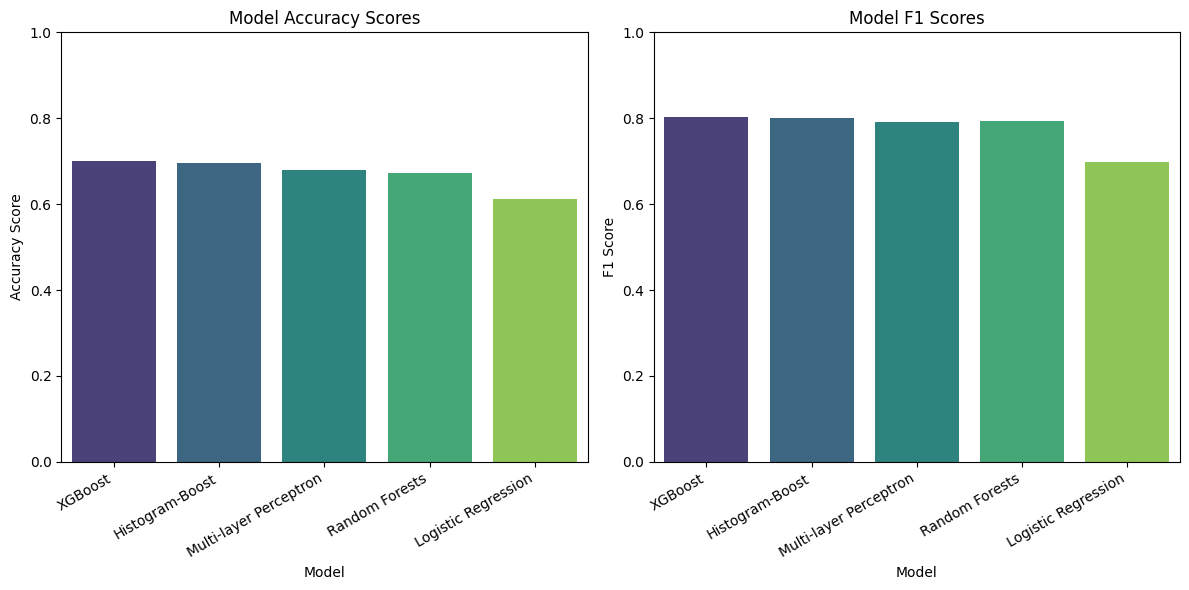

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for the results
data = {
    'Model': ['XGBoost', 'Histogram-Boost', 'Multi-layer Perceptron', 'Random Forests', 'Logistic Regression'],
    'Accuracy Score': [0.700, 0.696, 0.680, 0.672, 0.612],
    'F1 Score': [0.802111, 0.800000, 0.790576, 0.793970, 0.697819]
}

df_results = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the accuracy scores
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy Score', data=df_results, palette='viridis')
plt.title('Model Accuracy Scores')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')

# Adjusting x-tick labels for better spacing
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them to the right

# Plotting the F1 scores
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1 Score', data=df_results, palette='viridis')
plt.title('Model F1 Scores')
plt.ylim(0, 1)
plt.ylabel('F1 Score')

# Adjusting x-tick labels for better spacing
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them to the right

# Show the plots
plt.tight_layout()
plt.show()


## Model Selection Interpretation
    - In the evaluation of classification models, XGBoost emerged as the top choice, achieving an accuracy of 76.08% and an F1 Score of 76.11%. Its ability to effectively capture complex relationships in the data makes it the preferred model for this project. While other models demonstrated strong performance, they did not reach this level of effectiveness.o avoid data skewness.

In [147]:
from xgboost import XGBClassifier

# Définir le modèle
model = XGBClassifier()

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [100, 200],  # Moins d'arbres
    'max_depth': [3, 4],         # Moins de profondeurs
    'learning_rate': [0.05],     # Moins de taux d'apprentissage
    'subsample': [0.8]           # Moins de sous-échantillons
}


In [148]:
from sklearn.model_selection import RandomizedSearchCV

# Configurer la recherche aléatoire
randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                       n_iter=10, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Ajuster la recherche sur les données d'entraînement
randomized_search.fit(X_train, y_train)


c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05],
                                        'max_depth': [3, 4],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8]},
                   scoring='f1', verbose=1)

In [150]:
# Obtenir les meilleurs paramètres et le meilleur modèle
best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_

# Évaluer le modèle sur les données de test
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Changer ici

# Afficher les résultats
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
Test Accuracy: 0.7026
Test F1 Score: 0.7041
